In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt

import FunctionFitting

<font size="3">The following function can be found in the FunctionFitting module: </br></br>
$f(x,A,W,C) = \dfrac{A}{1+\left(\dfrac{x-C}{W/2}\right)^2}$ </br></br>
Note: This is different than the lmfit internal lineshape lorentzian in that the amplitude is the height of the model not the area.</font>

In [3]:
#import the lorentzian function to use throughout the notebook
from FunctionFitting import lorentzian_func

# Question 1

<font size="3"><b>For each parameter A, C, W, what does it tell us about the peak? <b></br></font>

<font size="3">C is the center position of the peak. Or the x-location with the maximum y-value</br>
A is the y-value of the peak at the center position</br>
W is the Full With at Half Maximum, or the width of the peak defined between the values which are 1/2 of A (maximum value) </font>

In [4]:
from stattests import explore_lorentzian_pars

<font size="3">To see this in action use the explore_lorentzian_pars function from the stattests module. </br>
This function does a few things: </br>
Finds the maximum value of the y-data.  (Should be A)</br>
Finds the x-coordinate corresponding to the maximum y-data value (Should be C)</br>
Finds the width corresponding to the points on the x-axis which are 1/2 the value of the maximum y-value (Should be W)</br> </br>
Explore the relationship between these values and the parameter values of the lorentzian function</br>
Create y-data by changing the parameters of the lorentzian function and then pass the x and y data to explore_lorentzian_pars to see that they match. </br></font>

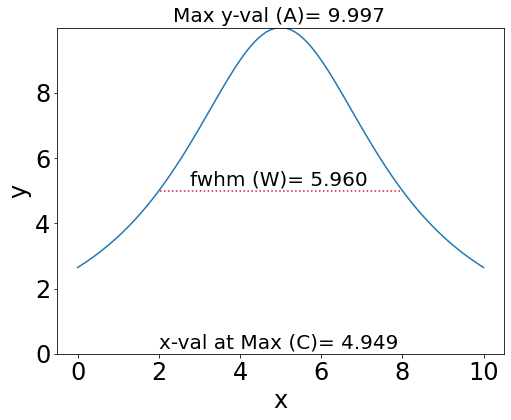

In [5]:
A0 = 10            # Anplitude of Lorentzian
C0 = 5             # Center position of Lorentzian
W0 = 6             # FWHM of Lorentzian
N = 100

#Make x-data and y-data
x = np.linspace(0,10,100)
y = lorentzian_func(x,A0,C0,W0)

explore_lorentzian_pars(x,y)

# Question 2

<font size="3">In order to use the lmfit package for the fitting, a Lorentzian class was created. The Lorentzian class inherits all the methods of the Function class but adds the guess_from_data() method which is unique to guessing the paramters for the lorentzian function defined above. The Lorentzian class takes as inputs x-data (x) and y-data (data). The y-data can be a (d x n) array where there are d different lorentzian datasets of length n. The more generic Function class also takes a function argument. </br>
The reason I structured the program like this was to incorporate it into a gui that I built to do analysis for XPyS (the XPS python package I developed). I have been wanting to generalize it to be used with any function and thought this was a good opportunity. See Section the GUI lmfitting section to see the gui.</br>
</font>

# Question 3

In [6]:
from FunctionFitting import Lorentzian

In [7]:
n_samples = 500     # Number of lorentzian datasets
noise_sigma = 0.78        # Scale of the noise (sigma of gaussian that noise is derived from)
A = 10            # Amplitude of Lorentzian
C = 5             # Center position of Lorentzian
W = 3             # FWHM of Lorentzian
N = 100           # number of data points

x = np.linspace(0,10,N)
fx = lorentzian_func(x,A,C,W)
noise = np.random.normal(scale = noise_sigma,size = (n_samples,len(x)))
y = np.tile(fx,(n_samples,1)) + noise

dataset = Lorentzian(x,y)

<font size="3">To fit the data, call the .fit() method of the Lorentzian object (dataset). This will call the .fit() method on the lmfit model and pass the 'leastsq' argument which performs a nonlinear least-squares fit using the Levenberg-Marquardt algorithm (explained below). </br>
Then call the .plot_fit() method on the Lorentzian object which will correspondingly call the .plot() method on the lmfit Model object. There are extra arguments shown below which allow confidence intervals to be plotted. By default the 2-sigma confidence intervals will be plotted. The confidence ranges can be changed by passing sigma = 1,2 or 3. Also, this can be turned off by passing plot_confidence = False.</font> 

[[Variables]]
    A:  9.86087208 +/- 0.20650810 (2.09%) (init = 10.77397)
    C:  5.04874439 +/- 0.03112209 (0.62%) (init = 5.151515)
    W:  2.99303717 +/- 0.09157675 (3.06%) (init = 3.232323)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, W) = -0.710


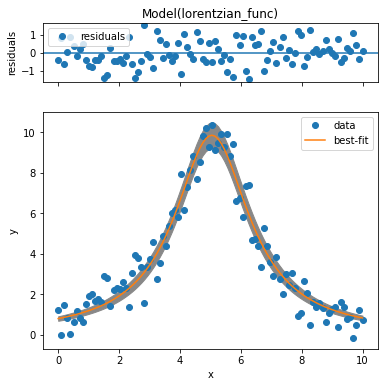

In [8]:
dataset.fit()
fig,ax = dataset.plot_fit(idx = 3,sigma = 3)

<font size="3">The optimization algorithm seeks to minimize $\chi^2 = \sum_{i}^{m} \left[\dfrac{y_i - f(x_i,\beta)}{\sigma_i}\right]^2$ where </br>
$y_i$ are the data points of which there are $m$ of</br>
$\sigma_i$ is the variance of data point i </br>
$f(x,\beta)$ is the function to minimize</br>
$\beta$ are the parameters to fit</br></br>
In our case $\beta = (A, C, W)$.</font>

## Visual Fit Test

<font size="3">As visual reassurance we can explore parameter space around the solution and observe whether we are in a local minimum by seeing how $\chi^2$ changes as we change a given parameter. To do this we use the check_pars1d function from the stattests module. Use the idx argument to pick a particular fit_result</font>

In [9]:
from stattests import check_pars1d

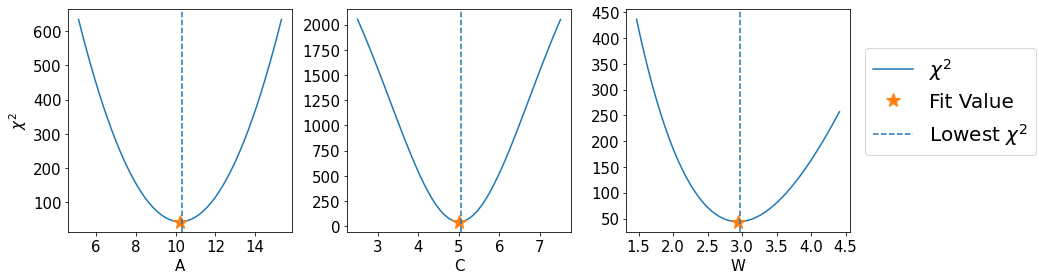

In [10]:
check_pars1d(dataset,idx = 0)

<font size="3">We see that the fit value is in a local minimum and corresponds to the lowest sum of squares of residuals. So we can argue that the fit parameters are "correct" at least as far as the algorithm is concerned. 
</br></font>

## Residual Test

<font size="3">The first test we can do is to analyze the residuals given by $r_i = y_i - f(x_i,\beta)$ </br>
We would expect them to be distributed with a normal distribution around 0 (since the noise was generated from such a distribution) with a standard deviation given by the noise_sigma variable. </br>
We can look at each fit result using the gauss_hist function. This will partition the input array into 50 (default) bins and then fit a gaussian to them</font>

In [11]:
from stattests import gauss_hist

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 50.1345663
    reduced chi-square = 1.06669290
    Akaike info crit   = 6.13438550
    Bayesian info crit = 11.8704545
[[Variables]]
    amplitude:  6.85079957 +/- 0.50941051 (7.44%) (init = 15.11301)
    center:    -0.03475533 +/- 0.05613507 (161.52%) (init = -0.05514)
    sigma:      0.65705091 +/- 0.05696351 (8.67%) (init = 0.7196673)
    fwhm:       1.54723663 +/- 0.13413881 (8.67%) == '2.3548200*sigma'
    height:     4.15960724 +/- 0.30816088 (7.41%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.586


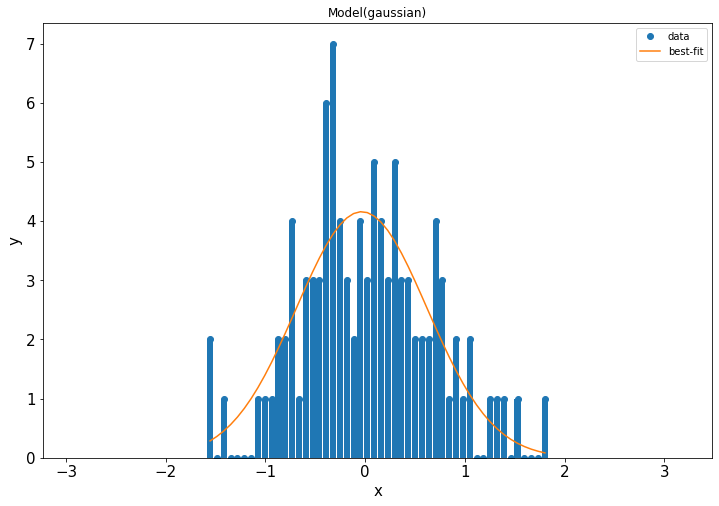

In [12]:
idx = 0
residual = dataset.mod.eval(params = dataset.fit_results[idx].params,x = dataset.x) - dataset.data[idx]
gauss_hist(residual)

<font size="3"> The center value shows pretty good agreement with being centered at zero. However, we can go a step further.  First we find the mean of the residuals of all of the fits. Then by the central limit theorem we would expect these means to be normally distributed around the true mean of the residual distribution. (should be 0).</font>

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 50
    # variables        = 3
    chi-square         = 267.246191
    reduced chi-square = 5.68608916
    Akaike info crit   = 89.8073645
    Bayesian info crit = 95.5434335
[[Variables]]
    amplitude:  1.93167568 +/- 0.05857975 (3.03%) (init = 3.108045)
    center:    -6.3823e-04 +/- 0.00103447 (162.08%) (init = 0.001332585)
    sigma:      0.02955146 +/- 0.00103551 (3.50%) (init = 0.03837092)
    fwhm:       0.06958838 +/- 0.00243844 (3.50%) == '2.3548200*sigma'
    height:     26.0774607 +/- 0.79069726 (3.03%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.578


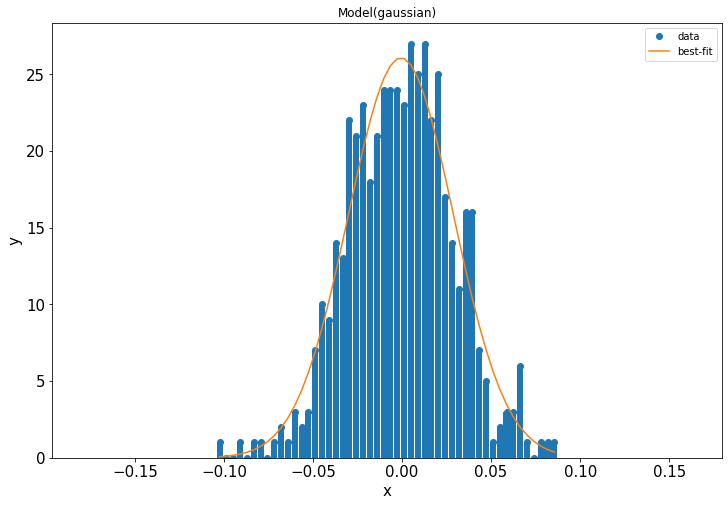

In [13]:
resid_means = np.array([np.mean(dataset.mod.eval(params = dataset.fit_results[i].params,x = dataset.x) - dataset.data[i]) for i in range(dataset.ndatasets)])
gauss_hist(resid_means)

<font size="3">They are centered around 0 and the data looks a lot like a gaussian. Lets do the same thing for the standard deviations of all the datasets which should be centered around the noise_sigma value.</font>

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 469.671237
    reduced chi-square = 9.99300504
    Akaike info crit   = 118.000497
    Bayesian info crit = 123.736566
[[Variables]]
    amplitude:  3.10990693 +/- 0.13576480 (4.37%) (init = 4.630184)
    center:     0.76058423 +/- 0.00279345 (0.37%) (init = 0.7555877)
    sigma:      0.05550058 +/- 0.00280614 (5.06%) (init = 0.04978692)
    fwhm:       0.13069387 +/- 0.00660797 (5.06%) == '2.3548200*sigma'
    height:     22.3542440 +/- 0.97508792 (4.36%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.580


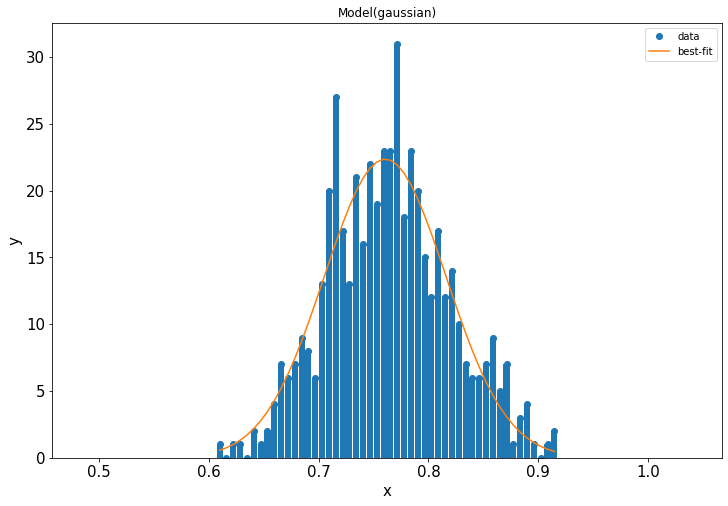

In [14]:
resid_stds = np.array([np.std(dataset.mod.eval(params = dataset.fit_results[i].params,x = dataset.x) - dataset.data[i]) for i in range(dataset.ndatasets)])
gauss_hist(resid_stds)

<font size="3">Should be centered very close to the noise_sigma value</font>

In [15]:
noise_sigma

0.78

## Chi^2 Test

<font size="3">We can also be a bit more quantitative and use a chi-squared test. We make a few assumptions and then carry out some analysis. </br>
<font size="3">1) We assume that we know the variance of each datapoint</br>
2) We assume each datapoint is an independent random variable</br>
3) We assume each datapoint is randomly distributed around its mean. </br><br>
<font size="3">All of these assumptions are met in this example case. We know that each datapoint is an independent random variable since we generated the noise from sampling a gaussian distribution and adding it to each datapoint. We know what the variance is because we input it as the argument to the random number generator. And we know that they are centered around the mean since we added them all to a predefined function.</br>
Then each term in $\chi^2$ should be roughly 1 and the sum should equal the number of datapoints </br>
We can check this using the check_chi2 function in stattests. Change the idx to look through the fit results...</font>

In [16]:
from stattests import check_chi2

In [17]:
check_chi2(dataset,idx = 20,variance = noise_sigma)

97.95327700809267

<font size="3">Again we can use the central limit theorem. The chi-squared values for all of the fits should be centered around the number of data points. (actually it should be a chi distribution, but at large N it approximates a gaussian)</font>

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 50
    # variables        = 3
    chi-square         = 599.754358
    reduced chi-square = 12.7607310
    Akaike info crit   = 130.224858
    Bayesian info crit = 135.960927
[[Variables]]
    amplitude:  775.950752 +/- 38.3066128 (4.94%) (init = 1238.802)
    center:     94.9580933 +/- 0.77973380 (0.82%) (init = 94.39497)
    sigma:      13.7146445 +/- 0.78587330 (5.73%) (init = 12.51315)
    fwhm:       32.2955191 +/- 1.85059016 (5.73%) == '2.3548200*sigma'
    height:     22.5714621 +/- 1.11231446 (4.93%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.582


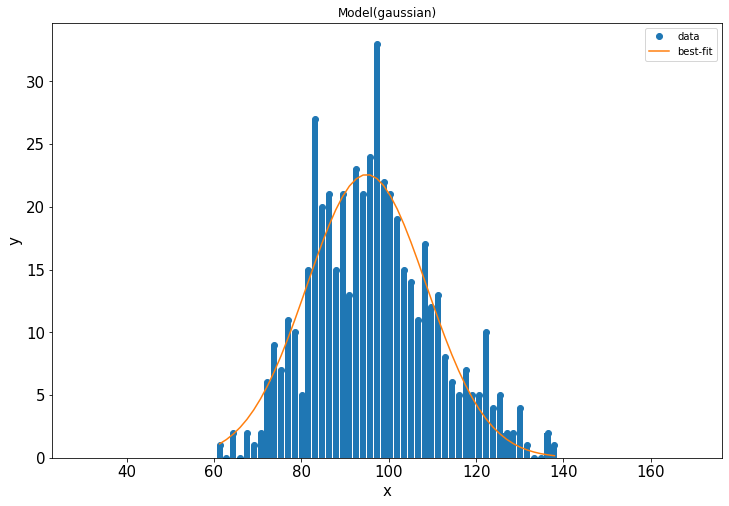

In [18]:
all_chi_squared = np.array([check_chi2(dataset,idx = i,variance = noise_sigma) for i in range(len(dataset.data))])

gauss_hist(all_chi_squared)

<font size="3">The center position should ve very close to N</font>

In [19]:
N

100

## Confidence Intervals from Covariance Matrix

<font size="3">We will see if the values estimated from the covariance matrix make sense. A 95% confidence interval for some parameter value means that 95% of the estimated confidence intervals will contain the true parameter value. In order to see if the covariance matrix is producing a good estmate of confidence intervals we use a monte carlo approach. We generated and fit 500 datasets earlier and will now analyze the confidence intervals from these fits. We know the true parameter value since we used it to generate the data so we check whether the true parameter value is within the calculated confidence interval range for each fit. If the fraction of times the true parameter value is within the range is close to the confidence interval than we know the covariance matrix is doing a good job at estimating the confidence interval and can conclude it is "correct" . </br></br>
I use the .stderr attribute of the fit_result to find the lower and upper regions. This value corresponds to the 1-sigma standard error, corresponding to a 68% confidence interval. So we check to see if the true value is within fit_value +- stderr 68% of the time. Since it will not be perfect I assume it is a good approximation to the confidence interval if the true value is within the range 65 % - 71% of the time. Otherwise I assume it is a bad approximation to the confidence interval. These can be changed with the low_bnd and hi_bnd arguments</font>


In [20]:
from stattests import verify_cov_err

Bad
True 1 sigma: 0.683
 Fraction: 0.71


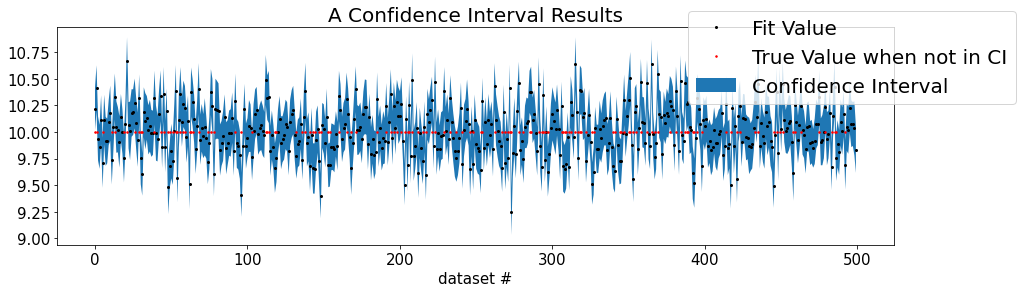

Good
True 1 sigma: 0.683
 Fraction: 0.682


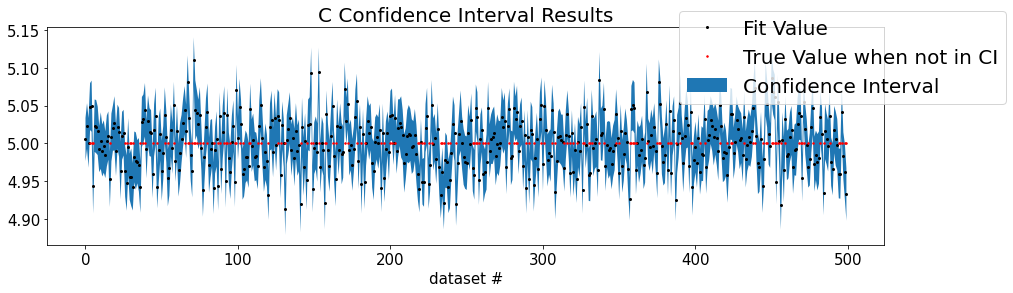

Good
True 1 sigma: 0.683
 Fraction: 0.688


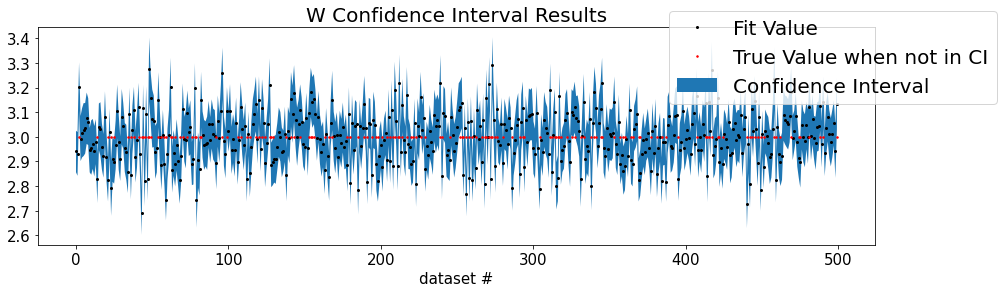

In [34]:
for p,tv in [('A',A),('C',C),('W',W)]:
    verify_cov_err(dataset,par = p,true_val = tv,low_bnd = 0.65,hi_bnd = 0.71)
    plt.show()
    print('='*50)

<font size="3">We see that the fraction of times that the true value is included within the predicted confidence intervals is very close to the true 1-sigma value of 68% and so can conclude that the confidence intervals are good estimates.</font>

# Question 4

## <b>Whats going on under the hood of lmfit?<b>

<font size="3">Under the hood lmfit provides a means of better organizing Models and Parameters for non-linear curve fitting. The Parameters are python objects which allow them to have much more functionality than is offered by scipy.optimize.curvefit. They can be varied or not varied. Their values and standard errors can be attached to them and additionally they can be efficiently organzied as an ordered dictionary in the Parameters class. the Model and ModelResult classes also allow for more flexibility and ease of handling if for instance you would like to perform different types of fits on the same model. For more control over the kinematics of fitting the Minimizer class can be used.</br>
Additionally, lmfit provides a better means of estimating uncertainties in the fitted parameters than is offered by scipy.optimize</font>

## <b>What are the key functions in the call stack and what do they do?<b>

<font size="3">When .fit() is called on the Lorentzian class a chain reaction of different calls and actions are initiated. First, the .fit() method of the lmfit Model class is called. This creates a ModelResult object named output and then calls .fit() on output. The ModelResult class is a child class of the lmfit Minimizer class. It therefore inherets the .minimize() method. Calling .fit() on the the ModelResult object (output) then calls .minimize() and passes 'leastsq' as the method argument.  This then calls the .leastsq() method (inhereted by ModelResult from Minimizer) which passes the \_\_residual function along with the variables' starting values (extracted using .setup_bounds() method of Parameter class) to scipy.optimize.leastsq where a Levenberg-Marquardt algorithm is executed.</font>

## <b>How does the fitting algorithm work<b>

<font size="3">In the following discussion, the details of all of the derivations can be found in:</br>
H. Gavin, "The Levenberg-Marquardt algorithm for nonlinear least squares curve-fitting problems", Department of Civil and Environmental Engineering, Duke University, https://people.duke.edu/~hpgavin/ce281/lm.pdf, Accessed: 07/20/2021.</br></font>

<font size="3">The fitting algorithm is the levenberg-marquardt algorithm which is a combination of both the gradient descent method and the Gauss-Newton methods. </br>
Going back to the chi-squared equation: </br>
$\chi^2 = \sum_{i}^{m} \left[\dfrac{y_i - f(x_i,\beta)}{\sigma_i}\right]^2$ 
We can re-write it in matrix form as </br>
$\chi^2 = \boldsymbol{y^TW\widehat{y}}-2\boldsymbol{y^TW\widehat{y} + \widehat{y}^TW\widehat{y}}$</br></br>
Where: </br>
$\boldsymbol{y}$ are the data </br>
$\boldsymbol{\widehat{y}}$ are the function values evaluated at the datapoints</br>
$\boldsymbol{W}$ are the weights</font>

### Gradient Descent

<font size="3">In gradient descent the point is to find the direction of steepest descent in parameter space. Then the parameters are updated in that direction and a new gradient is found. This continues until the $\chi^2$ reaches some threshold</br></font>

<font size="3">The following equation gives the direction of steepest descent:</br>
$\dfrac{\partial \chi^2}{\partial \boldsymbol{\beta}} = \alpha \boldsymbol{J^TW(y - \widehat{y})}$</font>

<font size="3">Where $\alpha$ is a constant that determines the size of the step</br>
$\boldsymbol{J}$ is the Jacobian Matrix</font>

<font size="3">To see this in action we use the OptimizationAlgorithms class from the lmdemo module. </font>

In [22]:
from lmdemo import OptimizationAlgorithms

<font size="3">Then we define a function. Use funcdemo function for now. I was getting some problems trying to use an arbitrary function. This does a good job at visualizing the different algorithms. </font>

In [35]:
def funcdemo(x,beta):
    
    return (beta[0]-5)**2*(x**2) + (beta[1] - 2)**3*(x**3)

In [36]:
par_space_grid = np.linspace(-1,1,100)    # define the parameter space to search through. This has to contain the true pars values
true_pars = np.array([0.5,0.6])

demo = OptimizationAlgorithms(funcdemo,x = par_space_grid,true_params = true_pars)

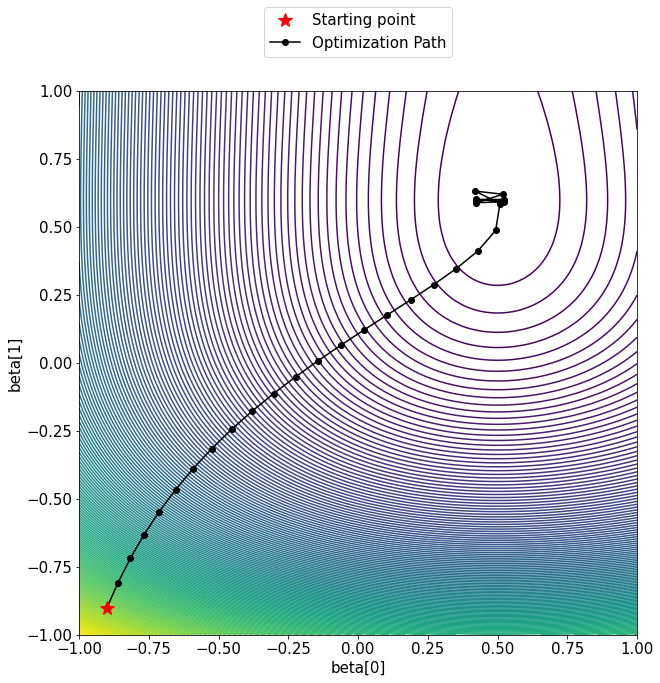

In [37]:
beta0 = np.array([-0.9,-0.9])    #starting parameters
alpha = 0.1                      #step size

demo.gradient_descent(beta0,dp = alpha)

### Gauss-Newton Method

<font size="3">In the Gauss Newton Method the function is linearized through a taylor expansion at the starting parameter values. </br>
$\boldsymbol{\widehat{y}(p+h) \approx \widehat{y}(p)} + \dfrac{\partial \boldsymbol{\widehat{y}}}{\partial \boldsymbol{p} }\boldsymbol{h}$ </br>
This is plugged back into the vector equation for $\chi^2$ and then:</br>
$\dfrac{\partial \chi^2}{\partial \boldsymbol{h} } = 0$ is solved, which results in:</br></font>

<font size="3">$\boldsymbol{h_{gn}}=\left[\boldsymbol{J^TWJ}\right]^{-1} \boldsymbol{J^TW(y - \widehat{y})}$</br>
Which is then used to update the parameter guesses until a convergence criteria is met</font>

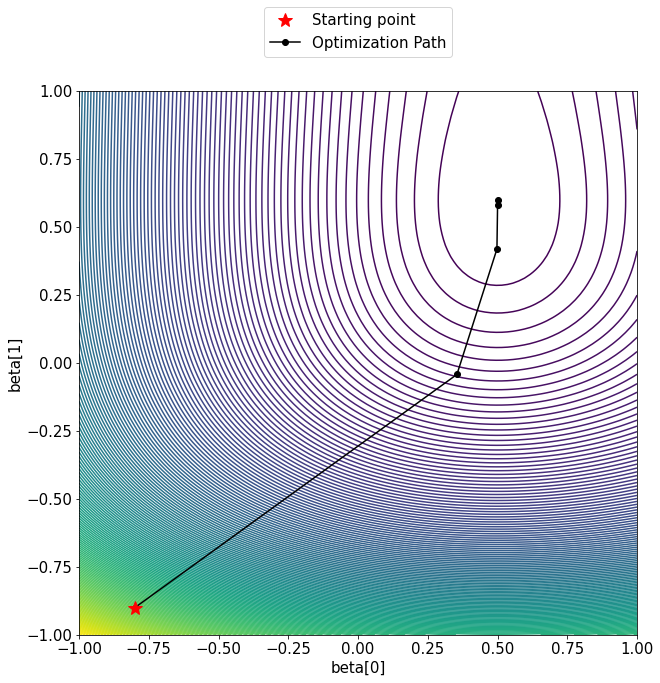

In [26]:
beta0 = np.array([-0.8,-0.9]) #starting parameters

demo.gauss_newton(beta0)

### Levenberg-Marquardt Method

<font size="3">The Levenberg-Marquardt Method is a combination of these two ideas. The parameter udpates are given by</br>
$\boldsymbol{h_{lm}}=\left[\boldsymbol{J^TWJ} + \lambda\boldsymbol{I}\right]^{-1} \boldsymbol{J^TW(y - \widehat{y})}$ </br></font>

<font size="3">The $\lambda$ parameter is updated each itertion depending one whether or not the $\chi^2$ value improves or not. At large values of $\lambda$ The algorithm procedes via gradient descent. And $\lambda$ is successively decreased until it approaches the Gauss-Newton Method.</br></font>

<font size="3">The algorithm was updated so lambda was scaled by the local curvature to be: </br>
$\boldsymbol{h_{lm}}=\left[\boldsymbol{J^TWJ} + \lambda diag(\boldsymbol{J^TWJ})\right]^{-1} \boldsymbol{J^TW(y - \widehat{y})}$</font>

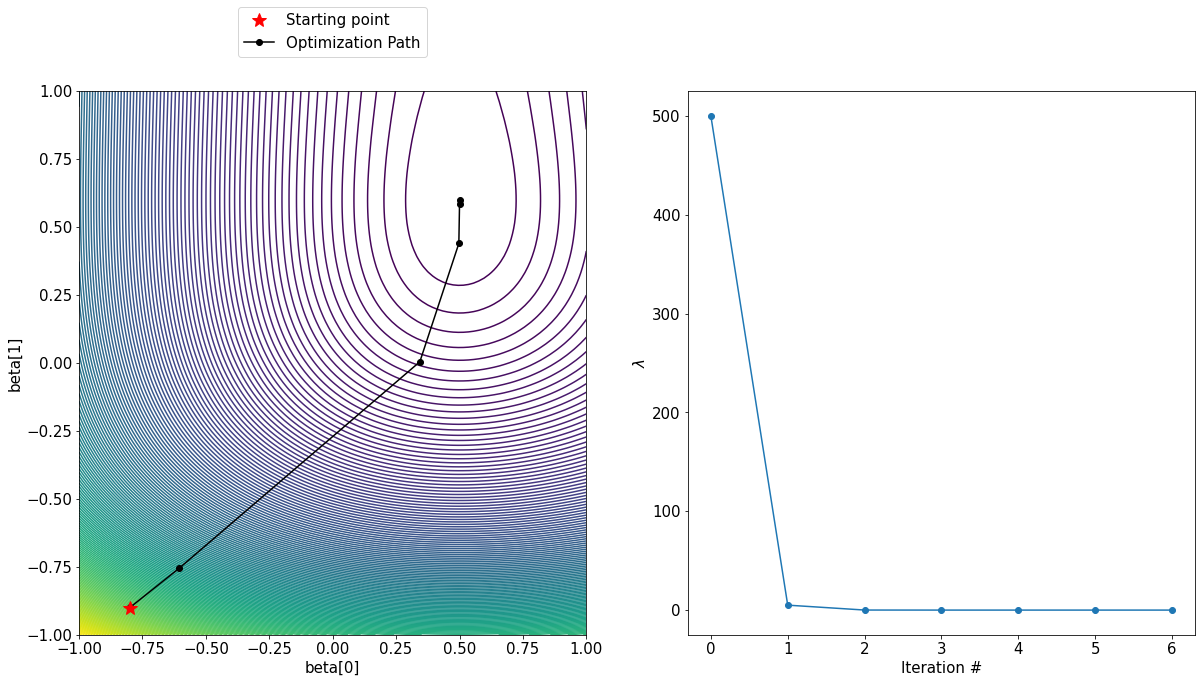

In [27]:
beta0 = np.array([-0.8,-0.9]) #starting parameters
starting_lambda = 500
demo.levenberg_marquardt(beta0,lamb = starting_lambda)

# GUI lmfitting

<font size="3"> I built a panel out of ipywidgets to interactively fit peaks for the XPS package I have been working on and have been wanting to generalize it to be used for any function. That is why I structured the program as I did. Below it uses the Lorentian class and an arbitrary function using the Function class</font>

In [28]:
import guifit

In [29]:
n_samples = 5     # Number of lorentzian datasets
noise_sigma = 0.78        # Scale of the noise (sigma of gaussian that noise is derived from)
A0 = 10            # Amplitude of Lorentzian
C0 = 5             # Center position of Lorentzian
W0 = 3             # FWHM of Lorentzian
N = 100           # number of data points

# Create x and y data like before
x = np.linspace(0,10,N)
fx = lorentzian_func(x,A0,C0,W0)
noise = np.random.normal(scale = noise_sigma,size = (n_samples,len(x)))
y = np.tile(fx,(n_samples,1)) + noise


# Create Lorentzian instance and then send it through interactive_fit
lorentzian_guidemo = Lorentzian(x,y)

guifit.interactive_fit(lorentzian_guidemo)

Output()

Output()

<font size="3"> For an arbitrary function I havn't come up with a good way to automatically initialize the parameters. So it has to be done before sending it through guifit.interactive_fit</font>

In [30]:
from FunctionFitting import Function

In [31]:
def arbitrary_function(x,par1,par2):
    
    return par1*x**2 + par2

In [32]:
n_samples = 5     # Number of datasets
noise_sigma = 0.78        # Scale of the noise (sigma of gaussian that noise is derived from)
par1 = 5
par2 = 2
N = 100           # number of data points

x = np.linspace(-2,2,N)
fx = arbitrary_function(x,par1,par2)
noise = np.random.normal(scale = noise_sigma,size = (n_samples,len(x)))
y = np.tile(fx,(n_samples,1)) + noise

# Dont have a great way for making the parameters for an arbitrary function so the lmfit model and parameters have to be made outside and then passed to the Function class
mod = lmfit.Model(arbitrary_function)
pars = mod.make_params()

pars['par1'].value = par1
pars['par2'].value = par2


arb_func = Function(x,y,lmfitmod = mod,lmfitpars = pars)
guifit.interactive_fit(arb_func)

Output()

Output()